<a href="https://colab.research.google.com/github/reidnersousa/IFB_OPT3_Machine-Learning_2023-2/blob/main/aula07Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('expectativa_vida.csv')

df.info()
df.describe()

df['gdpPercap']




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


0       779.445314
1       820.853030
2       853.100710
3       836.197138
4       739.981106
           ...    
1699    706.157306
1700    693.420786
1701    792.449960
1702    672.038623
1703    469.709298
Name: gdpPercap, Length: 1704, dtype: float64

In [ ]:
import pandas as pd

# Se você já tem um DataFrame 'df' e deseja verificar a coluna 'gdpPercap':
if pd.to_numeric(df['pop'], errors='coerce').isna().any():
    print("A coluna 'gdpPercap' contém valores que não são números.")
else:
    print("A coluna 'gdpPercap' não contém valores que não são números.")


A coluna 'gdpPercap' não contém valores que não são números.


tratando valores ausente

In [ ]:
print(df.shape)
df.drop
df.shape
df

(1704, 6)


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


codificando variavies

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crie uma instância do LabelEncoder
label_encoder_continente = LabelEncoder()

# Acesse a coluna 'continent' da variável 'saida' como uma Series
df['continent'] = label_encoder_continente.fit_transform(df['continent'])
df['country'] = label_encoder_continente.fit_transform(df['country'])

df

,country,continent,year,lifeExp,pop,gdpPercap
0,0,2,1952,28.801,8425333,779.445314
1,0,2,1957,30.332,9240934,820.853030
2,0,2,1962,31.997,10267083,853.100710
3,0,2,1967,34.020,11537966,836.197138
4,0,2,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,141,0,1987,62.351,9216418,706.157306
1700,141,0,1992,60.377,10704340,693.420786
1701,141,0,1997,46.809,11404948,792.449960
1702,141,0,2002,39.989,11926563,672.038623


In [ ]:
## variavel indepedente
entrada =df[['country','continent','year','pop','gdpPercap']]
print(entrada)
## variavel dependente
saida = df.iloc[:,3]
saida


      country  continent  year       pop   gdpPercap
0           0          2  1952   8425333  779.445314
1           0          2  1957   9240934  820.853030
2           0          2  1962  10267083  853.100710
3           0          2  1967  11537966  836.197138
4           0          2  1972  13079460  739.981106
...       ...        ...   ...       ...         ...
1699      141          0  1987   9216418  706.157306
1700      141          0  1992  10704340  693.420786
1701      141          0  1997  11404948  792.449960
1702      141          0  2002  11926563  672.038623
1703      141          0  2007  12311143  469.709298

[1704 rows x 5 columns]


0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

seperando os dados

In [ ]:
from sklearn.model_selection import  train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
entrada_train ,entrada_test ,saida_train , saida_test = train_test_split(entrada,saida,test_size =0.2 ,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression()
##treino
modelo.fit(entrada_train,saida_train)
r_sq = modelo.score(entrada,saida)
print("r_sq",r_sq)
previsoes = modelo.predict(entrada_test)
rmse = mean_squared_error(saida_test ,previsoes,squared=False)
r2 = r2_score(saida_test,previsoes)

print(r2)

r_sq 0.6421133711967667
0.6435159422433594


In [ ]:
print("Inter",modelo.intercept_)

Inter -517.6092620027852


Análise dos Resíduos:

In [ ]:
residuos = saida_test - previsoes
print(residuos)

249     10.157050
6      -21.420094
217    -12.800096
966      2.833495
1674   -13.961436
          ...    
1058     2.741657
315      0.454198
581      2.931807
170      5.159700
1195     8.447979
Name: lifeExp, Length: 341, dtype: float64


gerando o grafico

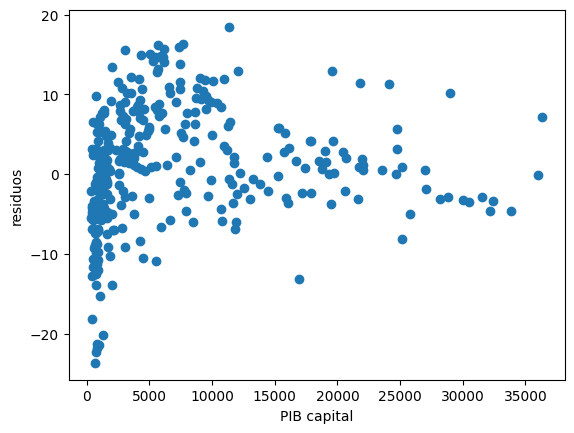

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(entrada_test['gdpPercap'],residuos)
plt.xlabel('PIB capital')
plt.ylabel('residuos')
plt.show()

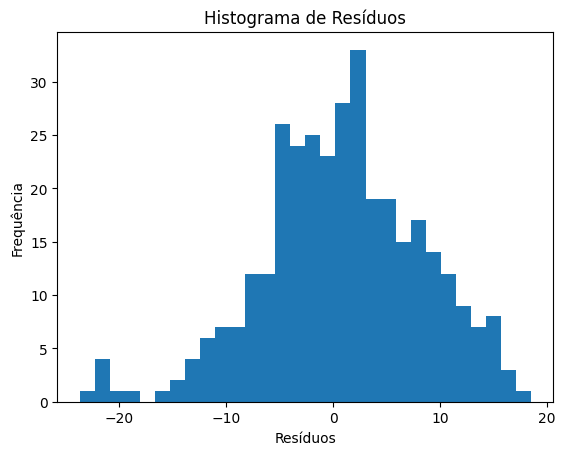

In [ ]:
plt.hist(residuos, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()
